In [190]:
%matplotlib inline

import os, pathlib, matplotlib
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

In [191]:
cwd = pathlib.Path.cwd()
performance_data_path = cwd / "data" / "performance_log.csv"
print(performance_data_path)

/Users/jacob.naylor/Code/HomeValues/data/performance_log.csv


In [192]:
df = pd.read_csv(performance_data_path, sep="|")
df[['version_num', 'notes']].head(50)

version_num  \
0   1             
1   1             
2   1             
3   1             
4   1             
5   2             
6   2             
7   2             
8   2             
9   2             
10  3             
11  3             
12  3             
13  3             
14  3             
15  4             
16  4             
17  4             
18  4             
19  4             
20  5             
21  5             
22  5             
23  5             
24  5             
25  6             
26  6             
27  6             
28  6             
29  6             
30  7             
31  7             
32  7             
33  7             
34  7             
35  8             
36  8             
37  8             
38  9             
39  9             
40  9             
41  8             
42  8             
43  8             
44  9             
45  9             
46  9             

                                                                                                                                                                  notes  
0   Benchmark implementations of RandomForest, Neural Net, and Linear Regression. Only numeric features of beds, baths, rooms, sqft, lotsize, and beds & baths per sqft  
1   Benchmark implementations of RandomForest, Neural Net, and Linear Regression. Only numeric features of beds, baths, rooms, sqft, lotsize, and beds & baths per sqft  
2   Benchmark implementations of RandomForest, Neural Net, and Linear Regression. Only numeric features of beds, baths, rooms, sqft, lotsize, and beds & baths per sqft  
3   Benchmark implementations of RandomForest, Neural Net, and Linear Regression. Only numeric features of beds, baths, rooms, sqft, lotsize, and beds & baths per sqft  
4   Benchmark implementations of RandomForest, Neural Net, and Linear Regression. Only numeric features of beds, baths, rooms, sqft, lotsize, and beds & baths per sqft  
5   Added Last Sale Price Feature                                                                                                                                        
6   Added Last Sale Price Feature                                                                                                                                        
7   Added Last Sale Price Feature                                                                                                                                        
8   Added Last Sale Price Feature                                                                                                                                        
9   Added Last Sale Price Feature                                                                                                                                        
10  Added a bunch of nodes to the NN model.                                                                                                                              
11  Added a bunch of nodes to the NN model.                                                                                                                              
12  Added a bunch of nodes to the NN model.                                                                                                                              
13  Added a bunch of nodes to the NN model.                                                                                                                              
14  Added a bunch of nodes to the NN model.                                                                                                                              
15  Added yearBuilt & priorSaleAmount features.                                                                                                                          
16  Added yearBuilt & priorSaleAmount features.                                                                                                                          
17  Added yearBuilt & priorSale

In [193]:
df.loc[df['model_name'] == "LR", 'model_name'] = "Linear Regression"
df.loc[df['model_name'] == "NN", 'model_name'] = "Neural Network"
df.loc[df['model_name'] == "RF", 'model_name'] = "Random Forest"
df.loc[df['model_name'] == "GBR", 'model_name'] = "Gradient Boosted Trees"

In [194]:
df = df[df['model_name'] != "benchmark_zero"]
df = df[['version_num', 'model_name', 'rmse']]
df.tail()

version_num              model_name           rmse
40  9            Gradient Boosted Trees  135836.011469
42  8            benchmark_mean          504401.674641
43  8            Gradient Boosted Trees  135576.733284
45  9            benchmark_mean          504401.674641
46  9            Random Forest           144766.347740

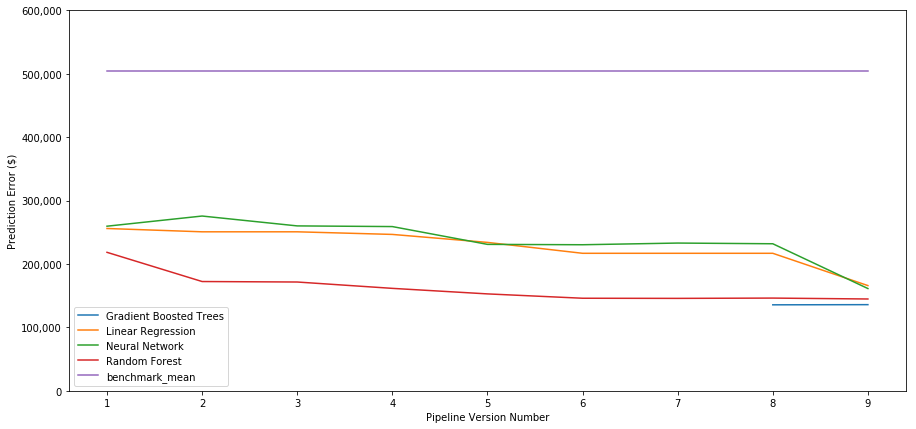

In [195]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))

for key, grp in df.groupby(['model_name']):
    ax = grp.plot(ax=ax, kind='line', x='version_num', y='rmse', label=key) #, c=key, label=key)
    ax.set_ylim(bottom=0, top=600000)
    ax.set_xlabel("Pipeline Version Number")
    ax.set_ylabel("Prediction Error ($)")
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [196]:
cwd = pathlib.Path.cwd()
feature_importance_data_path = cwd / "data" / "feature_importance.csv"

In [197]:
feature_importance = pd.read_csv(feature_importance_data_path, sep="|")
feature_series = feature_importance.iloc[0].sort_values(ascending=False)
print(feature_series)

lastSaleAmount        4.590624e-01
squareFootage         4.266802e-01
daysSinceLastSale     2.972669e-02
yearBuilt             1.393742e-02
lotSize               1.294321e-02
beds_per_sqft         6.917566e-03
beds_per_bath         6.019857e-03
priorSaleAmount       5.783357e-03
bathrooms             5.340717e-03
lot_per_sqft          5.338589e-03
baths_per_sqft        5.206265e-03
daysSincePriorSale    5.127099e-03
zip_80209             3.932755e-03
rooms                 3.925867e-03
zip_80206             3.227327e-03
zip_80204             2.516934e-03
bedrooms              2.286622e-03
zip_80205             9.881527e-04
zip_80207             4.790320e-04
zip_80123             3.942661e-04
zip_80203             1.488243e-04
zip_80202             1.391911e-05
zip_80022             2.504226e-06
zip_80033             4.436350e-07
Name: 0, dtype: float64


Text(0, 0.5, 'Relative Feature Importance')

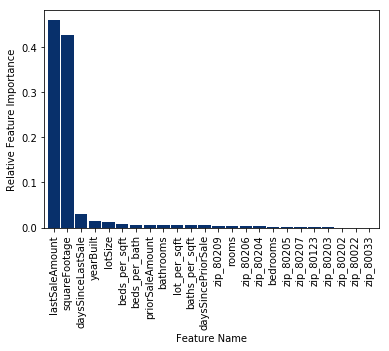

In [198]:
ax = feature_series.plot(kind="bar", colormap="Blues_r", width=0.9)
ax.set_xlabel("Feature Name")
ax.set_ylabel("Relative Feature Importance")